# Marketing Analytics Final Project
###### In this project, I did data scraping using Beautiful Soup from IMDB website about 1025 movies that people like the most. I will then 

![jupyter](pics/jupyter.png?raw=true)
![IMDB](pics/IMDB.png?raw=true)

In [1]:
# importing all the preliminaries and libraries we need
import datetime
import os
import pandas as pd
import re
import shelve
import time
import datetime
import requests
import numpy as np

# libraries to crawl websites
from bs4 import BeautifulSoup
# Plots
import matplotlib.pyplot as plt
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from wordcloud import WordCloud, STOPWORDS 

# used for training models
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model            import LinearRegression
from sklearn.datasets                import load_iris
from sklearn.model_selection         import train_test_split
from sklearn.naive_bayes             import GaussianNB
from sklearn.naive_bayes             import MultinomialNB
from sklearn.naive_bayes             import ComplementNB
from sklearn                         import tree
from sklearn                         import preprocessing
from sklearn.neighbors               import KNeighborsClassifier
from sklearn.metrics                 import confusion_matrix
from sklearn.neighbors               import NearestNeighbors
from sklearn                         import linear_model
from sklearn.neural_network          import MLPClassifier
from sklearn.metrics                 import accuracy_score

pd.set_option('display.max_rows',     20)
pd.set_option('display.max_columns',  20)
pd.set_option('display.width',       800)
pd.set_option('display.max_colwidth', 20)

In [2]:
# The links we need to scrape the file
link = ['https://www.imdb.com/list/ls056549735/',
            'https://www.imdb.com/list/ls056549735/?sort=list_order,asc&st_dt=&mode=detail&page=2',
            'https://www.imdb.com/list/ls056549735/?sort=list_order,asc&st_dt=&mode=detail&page=3',
            'https://www.imdb.com/list/ls056549735/?sort=list_order,asc&st_dt=&mode=detail&page=4',
            'https://www.imdb.com/list/ls056549735/?sort=list_order,asc&st_dt=&mode=detail&page=5',
            'https://www.imdb.com/list/ls056549735/?sort=list_order,asc&st_dt=&mode=detail&page=6',
            'https://www.imdb.com/list/ls056549735/?sort=list_order,asc&st_dt=&mode=detail&page=7',
            'https://www.imdb.com/list/ls056549735/?sort=list_order,asc&st_dt=&mode=detail&page=8',
            'https://www.imdb.com/list/ls056549735/?sort=list_order,asc&st_dt=&mode=detail&page=9',
            'https://www.imdb.com/list/ls056549735/?sort=list_order,asc&st_dt=&mode=detail&page=10',
            'https://www.imdb.com/list/ls056549735/?sort=list_order,asc&st_dt=&mode=detail&page=11']

In [3]:
# Finding all the reviews in the website and bringing them to python
total_movie_review = []
a = 1
for i in link:
    reviews           = requests.get(i).content
    soup                         = BeautifulSoup(reviews,'lxml')       
    movie_list = soup.find_all('div',{'class':'lister-item-content'}) 
    for r in range(len(movie_list)):
        one_review                   = {}
        one_review['scrapping_date'] = datetime.datetime.now()
    # get the order
        one_review_order = a
        one_review['movie_order']= one_review_order
        
    # get the movie name
        movie_name = movie_list[r].find_all('a')
        if movie_name == []:
            one_review_name = ''
        else:
            one_review_name = movie_name[0].text
        one_review['movie_name']= one_review_name
        
     # get the year 
        movie_year = movie_list[r].find_all('span')
        if movie_year == []:
            one_review_year = ''
        else:
            one_review_year = movie_year[1].text
        one_review['movie_year']= one_review_year
        
      # get the classifier 
        movie_class = movie_list[r].find('span', {'class':'certificate'})
        if movie_class is None:
            one_review_class = ''
        else:
            one_review_class = movie_class.text
        one_review['movie_classifier']= one_review_class     
        
    # get the duration 
        movie_dur = movie_list[r].find('span', {'class':'runtime'})
        if movie_dur is None:
            one_review_dur = ''
        else:
            one_review_dur = movie_dur.text
        one_review['movie_duration']= one_review_dur
        
     # get the review 
        movie_review = movie_list[r].find_all('p')
        if movie_review == []:
            one_review_review = ''
        else:
            one_review_review = movie_review[1].text
        one_review['movie_review']= one_review_review
        
    # get genre   
        movie_genre = movie_list[r].find('span', {'class':'genre'})
        try:
            one_review_genre = movie_genre.text
        except IndexError:
            one_review_genre = ''
        except AttributeError:
            one_review_genre = ''    
        one_review['movie_genre']= one_review_genre
    
     # get the star
        movie_star = movie_list[r].find('span', {'class':'ipl-rating-star__rating'})
        try:
            one_review_stars = movie_star.text
        except IndexError:
            one_review_stars = ''
        except AttributeError:
            one_review_genre = ''
        one_review['movie_star']= one_review_stars    
  
    # get the director
        movie_director = movie_list[r].find_all('a')
        try:
            one_review_director = movie_director[12].text 
        except IndexError:
            one_review_director = ''
        except AttributeError:
            one_review_genre = ''
        one_review['movie_director']= one_review_director         
  
    # get the votes
        movie_votes = movie_list[r].find('span', {'name':'nv'})
        try:
            one_review_votes = movie_votes.text
        except IndexError:
            one_review_votes = ''
        except AttributeError:
            one_review_genre = ''
        one_review['movie_votes']= one_review_votes 

    # get the gross
        movie_gross = movie_list[r].find_all('span')
        try:
            one_review_gross = movie_gross[62].text 
        except IndexError:
            one_review_gross = ''
        except AttributeError:
            one_review_genre = ''
        one_review['movie_gross']= one_review_gross        
        
        total_movie_review.append(one_review)
        a += 1

In [4]:
df = pd.DataFrame(total_movie_review)
df.head(10)

,scrapping_date,movie_order,movie_name,movie_year,movie_classifier,movie_duration,movie_review,movie_genre,movie_star,movie_director,movie_votes,movie_gross
0,2020-12-07 12:58:...,1,The Godfather,(1972),R,175 min,\n The aging ...,"\nCrime, Drama ...",9.2,Francis Ford Cop...,"1,598,182",$134.97M
1,2020-12-07 12:58:...,2,The Godfather: P...,(1974),R,202 min,\n The early ...,"\nCrime, Drama ...",9,Francis Ford Cop...,"1,116,301",$57.30M
2,2020-12-07 12:58:...,3,Schindler's List,(1993),R,195 min,\n In German-...,"\nBiography, Dra...",8.9,Oskar Schindler,"1,200,568",$96.90M
3,2020-12-07 12:58:...,4,The Lord of the ...,(2003),PG-13,201 min,\n Gandalf an...,"\nAction, Advent...",8.9,Peter Jackson,"1,625,120",$377.85M
4,2020-12-07 12:58:...,5,One Flew Over th...,(1975),R,133 min,\n A criminal...,\nDrama,8.7,Milos Forman,"908,686",$112.00M
5,2020-12-07 12:58:...,6,Forrest Gump,(1994),PG-13,142 min,\n The presid...,"\nDrama, Romance...",8.8,Robert Zemeckis,"1,784,590",$330.25M
6,2020-12-07 12:58:...,7,The Silence of t...,(1991),R,118 min,\n A young F....,"\nCrime, Drama, ...",8.6,Jonathan Demme,"1,255,444",$130.74M
7,2020-12-07 12:58:...,8,Casablanca,(1942),PG,102 min,\n A cynical ...,"\nDrama, Romance...",8.5,Michael Curtiz,"516,763",$1.02M
8,2020-12-07 12:58:...,9,The Departed,(2006),R,151 min,\n An underco...,"\nCrime, Drama, ...",8.5,Martin Scorsese,"1,176,295",$132.38M
9,2020-12-07 12:58:...,10,American Beauty,(1999),R,122 min,\n A sexually...,\nDrama,8.3,Sam Mendes,"1,060,786",$130.10M


In [5]:
df.columns

Index(['scrapping_date', 'movie_order', 'movie_name', 'movie_year', 'movie_classifier', 'movie_duration', 'movie_review', 'movie_genre', 'movie_star', 'movie_director', 'movie_votes', 'movie_gross'], dtype='object')

In [6]:
# cleanings
df['movie_year'] = df.movie_year.str.extract('(.)([0-9][0-9][0-9][0-9])(.)')[[1]].astype(int)
df['movie_duration'] = df.movie_duration.str.extract('([0-9]+)( \w\w\w)')[[0]].astype(float)
df['movie_star'] = df.movie_star.astype(float)
df['movie_votes'] = df.movie_votes.str.replace(',', '').astype(int)
df['movie_gross'] = df.movie_gross.str.extract('(.)([0-9]+\.[0-9]+)(M)')[[1]].astype(float)
df.dtypes

scrapping_date      datetime64[ns]
movie_order                  int64
movie_name                  object
movie_year                   int32
movie_classifier            object
movie_duration             float64
movie_review                object
movie_genre                 object
movie_star                 float64
movie_director              object
movie_votes                  int32
movie_gross                float64
dtype: object

In [7]:
df.head(10)

,scrapping_date,movie_order,movie_name,movie_year,movie_classifier,movie_duration,movie_review,movie_genre,movie_star,movie_director,movie_votes,movie_gross
0,2020-12-07 12:58:...,1,The Godfather,1972,R,175.0,\n The aging ...,"\nCrime, Drama ...",9.2,Francis Ford Cop...,1598182,134.97
1,2020-12-07 12:58:...,2,The Godfather: P...,1974,R,202.0,\n The early ...,"\nCrime, Drama ...",9.0,Francis Ford Cop...,1116301,57.30
2,2020-12-07 12:58:...,3,Schindler's List,1993,R,195.0,\n In German-...,"\nBiography, Dra...",8.9,Oskar Schindler,1200568,96.90
3,2020-12-07 12:58:...,4,The Lord of the ...,2003,PG-13,201.0,\n Gandalf an...,"\nAction, Advent...",8.9,Peter Jackson,1625120,377.85
4,2020-12-07 12:58:...,5,One Flew Over th...,1975,R,133.0,\n A criminal...,\nDrama,8.7,Milos Forman,908686,112.00
5,2020-12-07 12:58:...,6,Forrest Gump,1994,PG-13,142.0,\n The presid...,"\nDrama, Romance...",8.8,Robert Zemeckis,1784590,330.25
6,2020-12-07 12:58:...,7,The Silence of t...,1991,R,118.0,\n A young F....,"\nCrime, Drama, ...",8.6,Jonathan Demme,1255444,130.74
7,2020-12-07 12:58:...,8,Casablanca,1942,PG,102.0,\n A cynical ...,"\nDrama, Romance...",8.5,Michael Curtiz,516763,1.02
8,2020-12-07 12:58:...,9,The Departed,2006,R,151.0,\n An underco...,"\nCrime, Drama, ...",8.5,Martin Scorsese,1176295,132.38
9,2020-12-07 12:58:...,10,American Beauty,1999,R,122.0,\n A sexually...,\nDrama,8.3,Sam Mendes,1060786,130.10


Text(0.5, 1.0, 'Rating by stars')

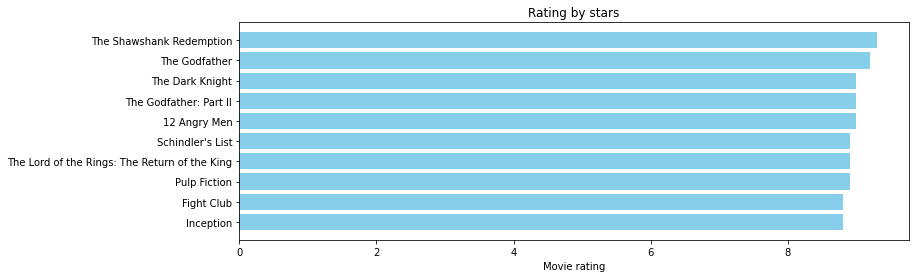

In [8]:
rate = df.sort_values('movie_star', ascending=False)
plt.figure(figsize=(12,4))
plt.barh(rate['movie_name'].head(10),
         rate['movie_star'].head(10), 
         align ='center',
         color ='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Movie rating")
plt.title("Rating by stars")

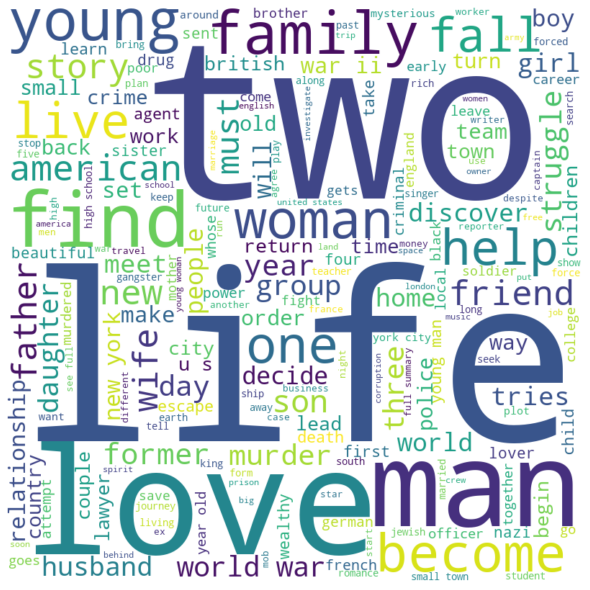

In [9]:
 def wordcloud(file):   
    comment_words = '' 
    stopwords = set(STOPWORDS) 

    for val in file: 
        val = str(val) 
        tokens = val.split() 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 
        comment_words += " ".join(tokens)+" "  

    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words)  
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud, interpolation = 'bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

wordcloud(df['movie_review'])

### Now I am going to test for some models. I will use all the models in 3 different sets. One including order, year, duration and vote which is the most basic one and it contains the most data. I want to see how well the models can predict the star. Then I will add gross to see if gross will influence how many stars people are giving. Notice that IMDB is missing a lot of information on gross for many movies, so it will have a far less data. Similarly, I will add movie classifier instead of gross with some more edition with classifier. Because there are different classifications among different countries

In [10]:
df['movie_star'] = df['movie_star'].round()

In [11]:
## 1st set
dta_1 = df.drop(['scrapping_date', 'movie_name','movie_classifier','movie_review','movie_genre','movie_director','movie_gross'], axis = 1)
dta_1 = dta_1. dropna()

In [12]:
dta_1

,movie_order,movie_year,movie_duration,movie_star,movie_votes
0,1,1972,175.0,9.0,1598182
1,2,1974,202.0,9.0,1116301
2,3,1993,195.0,9.0,1200568
3,4,2003,201.0,9.0,1625120
4,5,1975,133.0,9.0,908686
...,...,...,...,...,...
1020,1021,1995,192.0,7.0,28593
1021,1022,1980,127.0,7.0,97408
1022,1023,1996,147.0,8.0,185385
1023,1024,1987,107.0,8.0,368543


In [13]:
dta_1.movie_star.unique()

array([9., 8., 7., 6.])

In [14]:
scaler = preprocessing.StandardScaler().fit(dta_1.iloc[:,[0,1,2,4]])
X_scaled = scaler.transform(dta_1.iloc[:,[0,1,2,4]])
Y = dta_1['movie_star']
# Let's split the data
x_train_vali, x_test, y_train_vali, y_test = train_test_split(X_scaled, 
                                                              Y, 
                                                              test_size    = 0.1,
                                                              random_state = 0)
x_train, x_vali, y_train, y_vali = train_test_split(x_train_vali,
                                                  y_train_vali,
                                                  test_size = 0.1,
                                                  random_state = 0)

In [15]:
# Fitting data-- KNN
for k in range(1,10):
    clf_KNN = KNeighborsClassifier(n_neighbors=k)
    clf_KNN.fit(x_train,y_train)
    y_vali_predict_KNN = clf_KNN.predict(x_vali)
    accuracy_test_KNN = accuracy_score(y_vali, y_vali_predict_KNN)
    print(confusion_matrix(y_vali, y_vali_predict_KNN), accuracy_test_KNN)
## choose 1

[[ 1  0  0  0]
 [ 0 16  8  0]
 [ 0  8 57  1]
 [ 0  0  0  2]] 0.8172043010752689
[[ 1  0  0  0]
 [ 2 17  5  0]
 [ 1 16 49  0]
 [ 0  0  0  2]] 0.7419354838709677
[[ 1  0  0  0]
 [ 1 15  8  0]
 [ 1  9 55  1]
 [ 0  0  0  2]] 0.7849462365591398
[[ 1  0  0  0]
 [ 1 17  6  0]
 [ 0 11 55  0]
 [ 0  0  0  2]] 0.8064516129032258
[[ 1  0  0  0]
 [ 0 16  8  0]
 [ 0 11 54  1]
 [ 0  0  0  2]] 0.7849462365591398
[[ 1  0  0  0]
 [ 0 16  8  0]
 [ 0 12 54  0]
 [ 0  0  0  2]] 0.7849462365591398
[[ 1  0  0  0]
 [ 0 16  8  0]
 [ 0 10 56  0]
 [ 0  0  0  2]] 0.8064516129032258
[[ 1  0  0  0]
 [ 0 16  8  0]
 [ 0 10 56  0]
 [ 0  0  0  2]] 0.8064516129032258
[[ 1  0  0  0]
 [ 0 16  8  0]
 [ 0  9 57  0]
 [ 0  0  0  2]] 0.8172043010752689


In [16]:
#  Fitting data-- Naive Bayes Classification
clf_NB = GaussianNB().fit(x_train, y_train)
y_vali_predict_NB = clf_NB.predict(x_vali)
accuracy_test_NB = accuracy_score(y_vali, y_vali_predict_NB)
print(confusion_matrix(y_vali, y_vali_predict_NB), accuracy_test_NB)
## not accurate on Naive Bayes

[[ 1  0  0  0]
 [ 9 11  4  0]
 [ 6 30 29  1]
 [ 0  0  0  2]] 0.46236559139784944


In [17]:
# Fitting data-- Tree
## using gini
criterion_chosen     = ['entropy','gini'][1]
max_depth            = 10
for depth in range(2,max_depth):
    clf_Tree    = tree.DecisionTreeClassifier(
            criterion    = criterion_chosen, 
            max_depth    = depth,
            random_state = 96).fit(x_train, y_train)
    y_vali_predict_Tree = clf_Tree.predict(x_vali)
    accuracy_test_Tree = accuracy_score(y_vali, y_vali_predict_Tree)
    print(confusion_matrix(y_vali, y_vali_predict_Tree),accuracy_test_Tree)
 ## max_depth = 7 preforms the best  

[[ 0  1  0  0]
 [ 0 15  9  0]
 [ 0  7 59  0]
 [ 0  0  2  0]] 0.7956989247311828
[[ 0  1  0  0]
 [ 0 12 12  0]
 [ 0  1 65  0]
 [ 0  0  2  0]] 0.8279569892473119
[[ 1  0  0  0]
 [ 0 15  9  0]
 [ 0  4 62  0]
 [ 0  0  2  0]] 0.8387096774193549
[[ 1  0  0  0]
 [ 0 16  8  0]
 [ 0  1 64  1]
 [ 0  0  0  2]] 0.8924731182795699
[[ 1  0  0  0]
 [ 1 17  6  0]
 [ 0  2 63  1]
 [ 0  0  2  0]] 0.8709677419354839
[[ 1  0  0  0]
 [ 1 21  2  0]
 [ 0  3 62  1]
 [ 0  0  0  2]] 0.9247311827956989
[[ 1  0  0  0]
 [ 3 17  4  0]
 [ 0  3 62  1]
 [ 0  0  0  2]] 0.8817204301075269
[[ 1  0  0  0]
 [ 3 19  2  0]
 [ 0  3 62  1]
 [ 0  0  0  2]] 0.9032258064516129


In [18]:
# Fitting data-- Lasso
for alpha in (0.01,0.1,1,10,100):
    clf_Lasso = linear_model.Lasso(alpha= alpha)
    clf_Lasso.fit(x_train, y_train)
    y_vali_predict_Lasso = clf_Lasso.predict(x_vali).round()
    accuracy_test_Lasso = accuracy_score(y_vali, y_vali_predict_Lasso)
    print(confusion_matrix(y_vali, y_vali_predict_Lasso),accuracy_test_Lasso)
## choose 0.01

[[ 0  1  0  0]
 [ 0 10 14  0]
 [ 0  6 60  0]
 [ 0  0  0  2]] 0.7741935483870968
[[ 0  0  1  0]
 [ 0  0 24  0]
 [ 0  0 66  0]
 [ 0  0  2  0]] 0.7096774193548387
[[ 0  0  1  0]
 [ 0  0 24  0]
 [ 0  0 66  0]
 [ 0  0  2  0]] 0.7096774193548387
[[ 0  0  1  0]
 [ 0  0 24  0]
 [ 0  0 66  0]
 [ 0  0  2  0]] 0.7096774193548387
[[ 0  0  1  0]
 [ 0  0 24  0]
 [ 0  0 66  0]
 [ 0  0  2  0]] 0.7096774193548387


In [19]:
# Fitting data-- nural network
clf_NN = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
clf_NN.fit(x_train, y_train)
y_vali_predict_NN = clf_NN.predict(x_vali)
accuracy_test_NN_1 = accuracy_score(y_vali, y_vali_predict_NN)
print(confusion_matrix(y_vali, y_vali_predict_NN),accuracy_test_NN_1)


clf_NN_2 = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(10, 5, 2), random_state=1)
clf_NN_2.fit(x_train, y_train)
y_vali_predict_NN_2 = clf_NN_2.predict(x_vali)
accuracy_test_NN_2 = accuracy_score(y_vali, y_vali_predict_NN_2)
print(confusion_matrix(y_vali, y_vali_predict_NN),accuracy_test_NN_2)

## choose 2 

C:\Users\jerri\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[[ 0  1  0  0]
 [ 0 15  9  0]
 [ 0  9 57  0]
 [ 0  0  0  2]] 0.7956989247311828
[[ 0  1  0  0]
 [ 0 15  9  0]
 [ 0  9 57  0]
 [ 0  0  0  2]] 0.8387096774193549


C:\Users\jerri\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [20]:
#%% Testing data
print('KNN')
clf_KNN = KNeighborsClassifier(n_neighbors=1)
clf_KNN.fit(x_train,y_train)
y_test_predict_KNN = clf_KNN.predict(x_test)
accuracy_test_KNN = accuracy_score(y_test, y_test_predict_KNN)
print(confusion_matrix(y_test, y_test_predict_KNN),accuracy_test_KNN)

print('Naive Bayes')
clf_NB = GaussianNB().fit(x_train, y_train)
y_test_predict_NB = clf_NB.predict(x_test)
accuracy_test_NB = accuracy_score(y_test, y_test_predict_NB)
print(confusion_matrix(y_test, y_test_predict_NB),accuracy_test_NB)

print('Tree')
criterion_chosen     = ['entropy','gini'][1]
clf_Tree    = tree.DecisionTreeClassifier(
        criterion    = criterion_chosen, 
        max_depth    = 7,
        random_state = 96).fit(x_train, y_train)
y_test_predict_Tree = clf_Tree.predict(x_test)
accuracy_test_Tree = accuracy_score(y_test, y_test_predict_Tree)
print(confusion_matrix(y_test, y_test_predict_Tree),accuracy_test_Tree)

print('Lasso')
clf_Lasso = linear_model.Lasso(alpha=0.01)
clf_Lasso.fit(x_train, y_train)
y_test_predict_Lasso = clf_Lasso.predict(x_test).round()
accuracy_test_Lasso = accuracy_score(y_test, y_test_predict_Lasso)
print(confusion_matrix(y_test, y_test_predict_Lasso),accuracy_test_Lasso)

print('Nural Network')
clf_NN = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(10,5, 2), random_state=1)
clf_NN_2.fit(x_train, y_train)
y_test_predict_NN_2 = clf_NN_2.predict(x_test)
accuracy_test_NN_2 = accuracy_score(y_test, y_test_predict_NN_2)
print(confusion_matrix(y_test, y_test_predict_NN_2),accuracy_test_NN_2)

## Tree works very well!

KNN
[[ 1  3  2  0]
 [ 1 23 10  0]
 [ 0 10 49  0]
 [ 0  0  2  2]] 0.7281553398058253
Naive Bayes
[[ 5  1  0  0]
 [ 8 10 16  0]
 [ 4 25 29  1]
 [ 0  0  1  3]] 0.4563106796116505
Tree
[[ 4  2  0  0]
 [ 0 26  8  0]
 [ 0  9 50  0]
 [ 0  0  1  3]] 0.8058252427184466
Lasso
[[ 0  2  4  0]
 [ 0  8 26  0]
 [ 0 13 46  0]
 [ 0  0  1  3]] 0.5533980582524272
Nural Network
[[ 1  4  1  0]
 [ 0 17 17  0]
 [ 0  7 52  0]
 [ 0  0  1  3]] 0.7087378640776699


C:\Users\jerri\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [25]:
## 2nd set
dta_2 = df.drop(['scrapping_date', 'movie_name','movie_classifier','movie_review','movie_genre','movie_director'], axis = 1)
dta_2 = dta_2. dropna()

In [26]:
dta_2

,movie_order,movie_year,movie_duration,movie_star,movie_votes,movie_gross
0,1,1972,175.0,9.0,1598182,134.97
1,2,1974,202.0,9.0,1116301,57.30
2,3,1993,195.0,9.0,1200568,96.90
3,4,2003,201.0,9.0,1625120,377.85
4,5,1975,133.0,9.0,908686,112.00
...,...,...,...,...,...,...
1020,1021,1995,192.0,7.0,28593,13.56
1021,1022,1980,127.0,7.0,97408,108.19
1022,1023,1996,147.0,8.0,185385,49.10
1023,1024,1987,107.0,8.0,368543,59.74


In [31]:
scaler = preprocessing.StandardScaler().fit(dta_2.iloc[:,[0,1,2,4,5]])
X_scaled = scaler.transform(dta_2.iloc[:,[0,1,2,4,5]])
Y = dta_2['movie_star']
# Let's split the data
x_train_vali, x_test, y_train_vali, y_test = train_test_split(X_scaled, 
                                                              Y, 
                                                              test_size    = 0.1,
                                                              random_state = 0)
x_train, x_vali, y_train, y_vali = train_test_split(x_train_vali,
                                                  y_train_vali,
                                                  test_size = 0.1,
                                                  random_state = 0)

In [32]:
# Fitting data-- KNN
for k in range(1,10):
    clf_KNN = KNeighborsClassifier(n_neighbors=k)
    clf_KNN.fit(x_train,y_train)
    y_vali_predict_KNN = clf_KNN.predict(x_vali)
    accuracy_test_KNN = accuracy_score(y_vali, y_vali_predict_KNN)
    print(confusion_matrix(y_vali, y_vali_predict_KNN), accuracy_test_KNN)
## choose 2

[[ 1  0  0  0]
 [ 0 14 11  0]
 [ 0  4 28  0]
 [ 0  0  1  1]] 0.7333333333333333
[[ 1  0  0  0]
 [ 0 23  2  0]
 [ 0  7 25  0]
 [ 0  0  2  0]] 0.8166666666666667
[[ 0  1  0  0]
 [ 0 16  9  0]
 [ 0  3 29  0]
 [ 0  0  1  1]] 0.7666666666666667
[[ 0  1  0  0]
 [ 0 16  9  0]
 [ 0  3 29  0]
 [ 0  0  2  0]] 0.75
[[ 0  1  0  0]
 [ 0 15 10  0]
 [ 0  3 29  0]
 [ 0  0  1  1]] 0.75
[[ 0  1  0  0]
 [ 0 15 10  0]
 [ 0  4 28  0]
 [ 0  0  2  0]] 0.7166666666666667
[[ 0  1  0  0]
 [ 0 11 14  0]
 [ 0  4 28  0]
 [ 0  0  1  1]] 0.6666666666666666
[[ 0  1  0  0]
 [ 0 15 10  0]
 [ 0  5 27  0]
 [ 0  0  2  0]] 0.7
[[ 0  1  0  0]
 [ 0 11 14  0]
 [ 0  3 29  0]
 [ 0  0  2  0]] 0.6666666666666666


In [33]:
#  Fitting data-- Naive Bayes Classification
clf_NB = GaussianNB().fit(x_train, y_train)
y_vali_predict_NB = clf_NB.predict(x_vali)
accuracy_test_NB = accuracy_score(y_vali, y_vali_predict_NB)
print(confusion_matrix(y_vali, y_vali_predict_NB), accuracy_test_NB)
## Not doing well or bad

[[ 0  1  0  0]
 [ 3 15  7  0]
 [ 1 11 20  0]
 [ 0  0  1  1]] 0.6


In [34]:
# Fitting data-- Tree
## using gini
criterion_chosen     = ['entropy','gini'][1]
max_depth            = 10
for depth in range(2,max_depth):
    clf_Tree    = tree.DecisionTreeClassifier(
            criterion    = criterion_chosen, 
            max_depth    = depth,
            random_state = 96).fit(x_train, y_train)
    y_vali_predict_Tree = clf_Tree.predict(x_vali)
    accuracy_test_Tree = accuracy_score(y_vali, y_vali_predict_Tree)
    print(confusion_matrix(y_vali, y_vali_predict_Tree),accuracy_test_Tree)
 ## max_depth = 7 preforms the best 

[[ 0  1  0  0]
 [ 0 10 15  0]
 [ 0  3 29  0]
 [ 0  0  1  1]] 0.6666666666666666
[[ 0  1  0  0]
 [ 0 10 15  0]
 [ 0  3 29  0]
 [ 0  0  1  1]] 0.6666666666666666
[[ 0  1  0  0]
 [ 0 11 14  0]
 [ 0  2 30  0]
 [ 0  0  1  1]] 0.7
[[ 0  1  0  0]
 [ 0 12 13  0]
 [ 0  1 31  0]
 [ 0  0  1  1]] 0.7333333333333333
[[ 0  1  0  0]
 [ 0 14 11  0]
 [ 0  1 30  1]
 [ 0  0  1  1]] 0.75
[[ 0  1  0  0]
 [ 0 15 10  0]
 [ 0  1 30  1]
 [ 0  0  1  1]] 0.7666666666666667
[[ 0  1  0  0]
 [ 0 15 10  0]
 [ 0  1 30  1]
 [ 0  0  1  1]] 0.7666666666666667
[[ 0  1  0  0]
 [ 0 16  9  0]
 [ 0  2 29  1]
 [ 0  0  1  1]] 0.7666666666666667


In [35]:
# Fitting data-- Lasso
for alpha in (0.01,0.1,1,10,100):
    clf_Lasso = linear_model.Lasso(alpha= alpha)
    clf_Lasso.fit(x_train, y_train)
    y_vali_predict_Lasso = clf_Lasso.predict(x_vali).round()
    accuracy_test_Lasso = accuracy_score(y_vali, y_vali_predict_Lasso)
    print(confusion_matrix(y_vali, y_vali_predict_Lasso),accuracy_test_Lasso)
## choose 0.01

[[ 0  1  0  0]
 [ 0  3 22  0]
 [ 0  1 31  0]
 [ 0  0  1  1]] 0.5833333333333334
[[ 0  0  1  0]
 [ 0  0 25  0]
 [ 0  0 32  0]
 [ 0  0  2  0]] 0.5333333333333333
[[ 0  0  1  0]
 [ 0  0 25  0]
 [ 0  0 32  0]
 [ 0  0  2  0]] 0.5333333333333333
[[ 0  0  1  0]
 [ 0  0 25  0]
 [ 0  0 32  0]
 [ 0  0  2  0]] 0.5333333333333333
[[ 0  0  1  0]
 [ 0  0 25  0]
 [ 0  0 32  0]
 [ 0  0  2  0]] 0.5333333333333333


In [36]:
# Fitting data-- nural network
clf_NN = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
clf_NN.fit(x_train, y_train)
y_vali_predict_NN = clf_NN.predict(x_vali)
accuracy_test_NN_1 = accuracy_score(y_vali, y_vali_predict_NN)
print(confusion_matrix(y_vali, y_vali_predict_NN),accuracy_test_NN_1)


clf_NN_2 = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(10, 5, 2), random_state=1)
clf_NN_2.fit(x_train, y_train)
y_vali_predict_NN_2 = clf_NN_2.predict(x_vali)
accuracy_test_NN_2 = accuracy_score(y_vali, y_vali_predict_NN_2)
print(confusion_matrix(y_vali, y_vali_predict_NN),accuracy_test_NN_2)

## choose 2 

C:\Users\jerri\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[[ 0  1  0  0]
 [ 0 12 13  0]
 [ 0  6 26  0]
 [ 0  0  1  1]] 0.65
[[ 0  1  0  0]
 [ 0 12 13  0]
 [ 0  6 26  0]
 [ 0  0  1  1]] 0.7833333333333333


C:\Users\jerri\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [37]:
#%% Testing data
print('KNN')
clf_KNN = KNeighborsClassifier(n_neighbors=2)
clf_KNN.fit(x_train,y_train)
y_test_predict_KNN = clf_KNN.predict(x_test)
accuracy_test_KNN = accuracy_score(y_test, y_test_predict_KNN)
print(confusion_matrix(y_test, y_test_predict_KNN),accuracy_test_KNN)

print('Naive Bayes')
clf_NB = GaussianNB().fit(x_train, y_train)
y_test_predict_NB = clf_NB.predict(x_test)
accuracy_test_NB = accuracy_score(y_test, y_test_predict_NB)
print(confusion_matrix(y_test, y_test_predict_NB),accuracy_test_NB)

print('Tree')
criterion_chosen     = ['entropy','gini'][1]
clf_Tree    = tree.DecisionTreeClassifier(
        criterion    = criterion_chosen, 
        max_depth    = 7,
        random_state = 96).fit(x_train, y_train)
y_test_predict_Tree = clf_Tree.predict(x_test)
accuracy_test_Tree = accuracy_score(y_test, y_test_predict_Tree)
print(confusion_matrix(y_test, y_test_predict_Tree),accuracy_test_Tree)

print('Lasso')
clf_Lasso = linear_model.Lasso(alpha=0.01)
clf_Lasso.fit(x_train, y_train)
y_test_predict_Lasso = clf_Lasso.predict(x_test).round()
accuracy_test_Lasso = accuracy_score(y_test, y_test_predict_Lasso)
print(confusion_matrix(y_test, y_test_predict_Lasso),accuracy_test_Lasso)

print('Nural Network')
clf_NN = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(10,5, 2), random_state=1)
clf_NN_2.fit(x_train, y_train)
y_test_predict_NN_2 = clf_NN_2.predict(x_test)
accuracy_test_NN_2 = accuracy_score(y_test, y_test_predict_NN_2)
print(confusion_matrix(y_test, y_test_predict_NN_2),accuracy_test_NN_2)

## KNN and Tree preforms well!

KNN
[[ 0  0  1  0]
 [ 1 15  2  0]
 [ 0  5 39  0]
 [ 0  1  1  2]] 0.835820895522388
Naive Bayes
[[ 0  1  0  0]
 [ 0 12  6  0]
 [ 1 17 26  0]
 [ 0  0  1  3]] 0.6119402985074627
Tree
[[ 0  0  1  0]
 [ 0 13  5  0]
 [ 0  5 39  0]
 [ 0  0  0  4]] 0.835820895522388
Lasso
[[ 0  0  1  0  0]
 [ 0  4 14  0  0]
 [ 0  3 41  0  0]
 [ 0  0  1  2  1]
 [ 0  0  0  0  0]] 0.7014925373134329
Nural Network
[[ 0  1  0  0]
 [ 0 11  7  0]
 [ 0  4 40  0]
 [ 0  0  1  3]] 0.8059701492537313


C:\Users\jerri\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [40]:
df.movie_classifier.unique()

array(['R', 'PG-13', 'PG', 'Approved', 'Passed', 'G', 'GP', 'Not Rated',
       'M/PG', 'TV-PG', 'Unrated', '', 'TV-MA', 'NC-17'], dtype=object)

In [44]:
dta_3 = df.drop(['scrapping_date', 'movie_name','movie_review','movie_genre','movie_director','movie_gross'], axis = 1)
dta_3 = dta_3[dta_3.movie_classifier != 'Not Rated']
dta_3 = dta_3[dta_3.movie_classifier != 'Unrated']
dta_3 = dta_3. dropna()

In [45]:
dta_3

,movie_order,movie_year,movie_classifier,movie_duration,movie_star,movie_votes
0,1,1972,R,175.0,9.0,1598182
1,2,1974,R,202.0,9.0,1116301
2,3,1993,R,195.0,9.0,1200568
3,4,2003,PG-13,201.0,9.0,1625120
4,5,1975,R,133.0,9.0,908686
...,...,...,...,...,...,...
1020,1021,1995,R,192.0,7.0,28593
1021,1022,1980,PG,127.0,7.0,97408
1022,1023,1996,R,147.0,8.0,185385
1023,1024,1987,R,107.0,8.0,368543


###### https://help.imdb.com/article/contribution/titles/certificates/GU757M8ZJ9ZPXB39#
###### https://en.wikipedia.org/wiki/Motion_Picture_Association_film_rating_system

<img src="table.png" />

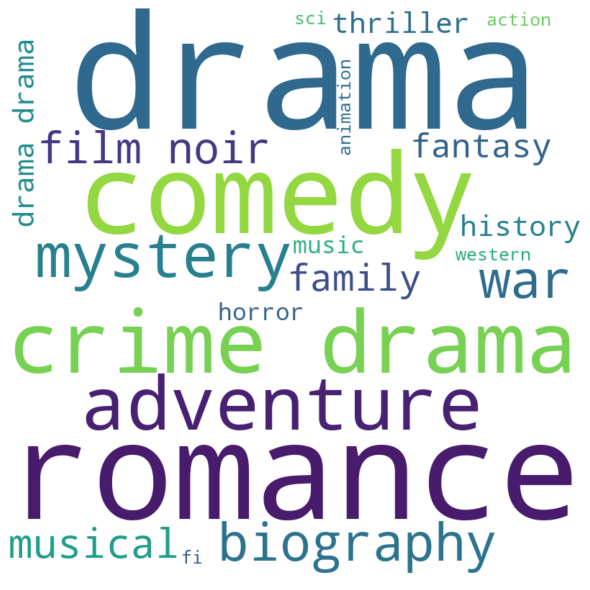

In [39]:
wordcloud(df.loc[df['movie_classifier'] =='Approved', 'movie_genre']) 

In [46]:
dta_3 = dta_3.replace({'NC-17':0,'R':1,'TV-MA':1, 'Approved':2,'PG-13':2,'GP':3,'M/PG':3,'PG':3,'G':4,'TV':4})

In [47]:
dta_3

,movie_order,movie_year,movie_classifier,movie_duration,movie_star,movie_votes
0,1,1972,1,175.0,9.0,1598182
1,2,1974,1,202.0,9.0,1116301
2,3,1993,1,195.0,9.0,1200568
3,4,2003,2,201.0,9.0,1625120
4,5,1975,1,133.0,9.0,908686
...,...,...,...,...,...,...
1020,1021,1995,1,192.0,7.0,28593
1021,1022,1980,3,127.0,7.0,97408
1022,1023,1996,1,147.0,8.0,185385
1023,1024,1987,1,107.0,8.0,368543
